# Version Check

In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))  

Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
scipy: 1.5.2
numpy: 1.19.2
matplotlib: 3.3.2
pandas: 1.1.3
sklearn: 0.23.2


# Load Libraries

In [2]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import csv
import os
import re
from sklearn.utils.class_weight import compute_class_weight

In [3]:
pre_datasets = pandas.read_csv('datasets_T.csv', low_memory=False)
headers = pre_datasets.iloc[0]
DATASETS  = pandas.DataFrame(pre_datasets.values[1:], columns=headers)
DATASETS = DATASETS.dropna(axis='columns', how='all')
CLASSIFICATION = DATASETS['STATUS']

In [4]:
encoder = LabelEncoder()
DATASETS['ID_REF'] = encoder.fit_transform(DATASETS['ID_REF'])
# CLASSIFICATION = pandas.Series(encoder.fit_transform(CLASSIFICATION),
#     index=CLASSIFICATION.index, name=CLASSIFICATION.name)

x_train, x_validate, y_train, y_validate = train_test_split(
DATASETS.drop(labels='STATUS', axis=1), CLASSIFICATION, test_size=0.3, random_state=3)
print(y_validate)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_validate = sc.transform(x_validate)


4        Healthy control
34    ulcerative colitis
18       Crohn's disease
22    ulcerative colitis
17       Crohn's disease
20    ulcerative colitis
15       Crohn's disease
26    ulcerative colitis
13       Crohn's disease
32    ulcerative colitis
5        Healthy control
Name: STATUS, dtype: object


In [5]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto',probability=True)))
models.append(('GB', GradientBoostingClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))

results1 = []
results2 = []
results3 = []
names = []

print(">Stratified KFold:")
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='roc_auc_ovo')
    results1.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# print("\n"+">Repeated KFold:")
# for name, model in models:
#     kfold = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1) #10 repeat is default
#     try:
#         cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='roc_auc_ovr')
#     except ValueError:
#         pass
#     results2.append(cv_results)

#     print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# print("\n"+">KFold:")
# for name, model in models:
#     kfold = KFold(n_splits=5, random_state=1, shuffle=True)
#     cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='roc_auc_ovr')
#     results3.append(cv_results)

#     print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

>Stratified KFold:
LR: 0.775000 (0.165831)
LDA: 0.816667 (0.213437)
KNN: 0.816667 (0.132681)
CART: 0.650000 (0.215058)
NB: 0.537500 (0.192029)
SVM: 0.350000 (0.238048)
GB: 0.866667 (0.163299)
MLP: 0.783333 (0.216346)
RF: 0.833333 (0.182574)


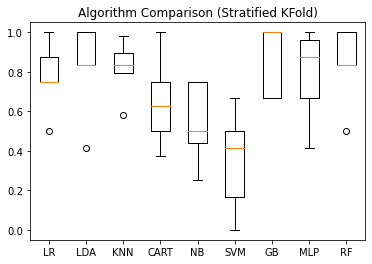

In [6]:
pyplot.boxplot(results1, labels=names)
pyplot.title('Algorithm Comparison (Stratified KFold)')
pyplot.show()

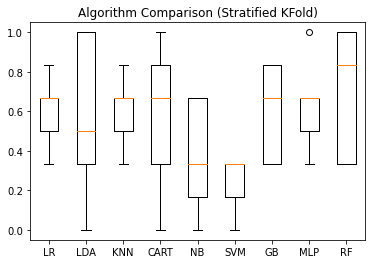

In [16]:
pyplot.boxplot(results1, labels=names)
pyplot.title('Algorithm Comparison (Stratified KFold)')
pyplot.show()

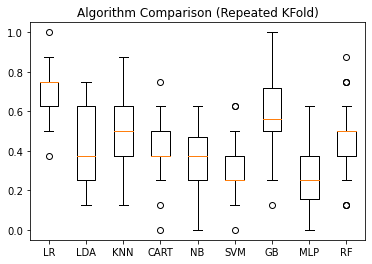

In [120]:
pyplot.boxplot(results2, labels=names)
pyplot.title('Algorithm Comparison (Repeated KFold)')
pyplot.show()

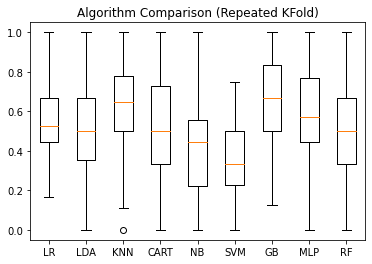

In [17]:
pyplot.boxplot(results2, labels=names)
pyplot.title('Algorithm Comparison (Repeated KFold)')
pyplot.show()

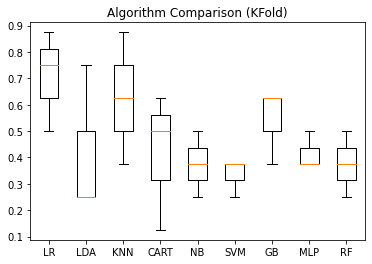

In [121]:
pyplot.boxplot(results3, labels=names)
pyplot.title('Algorithm Comparison (KFold)')
pyplot.show()

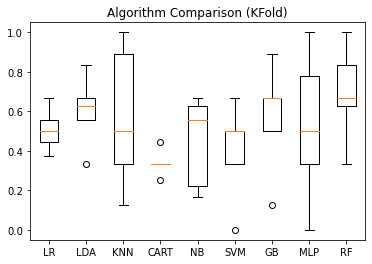

In [18]:
pyplot.boxplot(results3, labels=names)
pyplot.title('Algorithm Comparison (KFold)')
pyplot.show()

In [28]:
print("Performance report")
print("#"*100)
model1 = SVC(class_weight='balanced', kernel='rbf')
# model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)
predictions1 = model1.predict(x_validate)
print("Accuracy:", accuracy_score(y_validate, predictions1))
print(confusion_matrix(y_validate, predictions1))
print(classification_report(y_validate, predictions1))

Performance report
####################################################################################################
Accuracy: 0.8181818181818182
[[4 0 0]
 [1 1 0]
 [1 0 4]]
                    precision    recall  f1-score   support

   Crohn's disease       0.67      1.00      0.80         4
   Healthy control       1.00      0.50      0.67         2
ulcerative colitis       1.00      0.80      0.89         5

          accuracy                           0.82        11
         macro avg       0.89      0.77      0.79        11
      weighted avg       0.88      0.82      0.82        11



In [17]:
print("Prediction Classifier v2.0")
print("#"*100)

for name, model in models:
    MODEL = model
    MODEL.fit(x_train, y_train)
    predictions1 = MODEL.predict(x_validate)
    print(name, ":", accuracy_score(y_validate, predictions1))

Prediction Classifier v2.0
####################################################################################################
LR : 0.45454545454545453
LDA : 0.6363636363636364
KNN : 0.5454545454545454
CART : 0.18181818181818182
NB : 0.6363636363636364
SVM : 0.8181818181818182
GB : 0.7272727272727273
MLP : 0.36363636363636365
RF : 0.5454545454545454


In [8]:
model1 = SVC(class_weight='balanced', kernel='rbf')
model1.fit(x_train, y_train)
predictions1 = model1.predict(x_validate)
print(accuracy_score(y_validate, predictions1))
print(confusion_matrix(y_validate, predictions1))
print(classification_report(y_validate, predictions1))

0.8181818181818182
[[4 0 0]
 [1 1 0]
 [1 0 4]]
                    precision    recall  f1-score   support

   Crohn's disease       0.67      1.00      0.80         4
   Healthy control       1.00      0.50      0.67         2
ulcerative colitis       1.00      0.80      0.89         5

          accuracy                           0.82        11
         macro avg       0.89      0.77      0.79        11
      weighted avg       0.88      0.82      0.82        11



In [123]:
print("Logistic Regression")
print("#"*100)



model2 = LogisticRegression(max_iter=1000, class_weight='balanced')
# model2 = DecisionTreeClassifier(class_weight)
model2.fit(x_train, y_train)
predictions2 = model2.predict(x_validate)
print(accuracy_score(y_validate, predictions2))
print(confusion_matrix(y_validate, predictions2))
print(classification_report(y_validate, predictions2))

Logistic Regression
####################################################################################################
0.7272727272727273
[[2 2 0]
 [0 2 0]
 [1 0 4]]
                    precision    recall  f1-score   support

   Crohn's disease       0.67      0.50      0.57         4
   Healthy control       0.50      1.00      0.67         2
ulcerative colitis       1.00      0.80      0.89         5

          accuracy                           0.73        11
         macro avg       0.72      0.77      0.71        11
      weighted avg       0.79      0.73      0.73        11

